# **Step 1 Import data from kaggle**

In [ ]:
# Make sure to upload kaggle.json in Colab, then run these lines
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


## **Unzip the Data Set**

In [ ]:

# Download the dataset
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset
!unzip tuberculosis-tb-chest-xray-dataset.zip -d chest_xray


Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
License(s): copyright-authors
100% 663M/663M [00:09<00:00, 94.8MB/s]
100% 663M/663M [00:09<00:00, 76.8MB/s]
Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: chest_xray/TB_Chest_Radiography_

# **Importing Necessary library**

In [ ]:


# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import os
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical


##  **Setting the path**

In [ ]:

# Define paths for each class
normal_path = os.path.join('/content/chest_xray/TB_Chest_Radiography_Database/', 'Normal')
tuberculosis_path = os.path.join('/content/chest_xray/TB_Chest_Radiography_Database/', 'Tuberculosis')

# **Explortry Data Analysis**

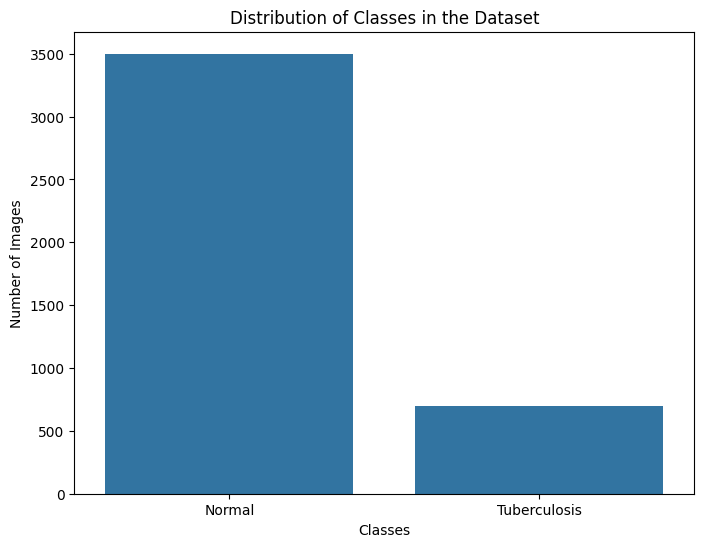

Normal Images:


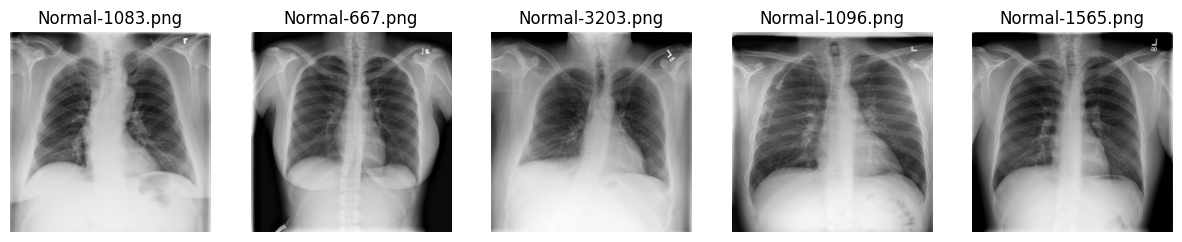

Tuberculosis Images:


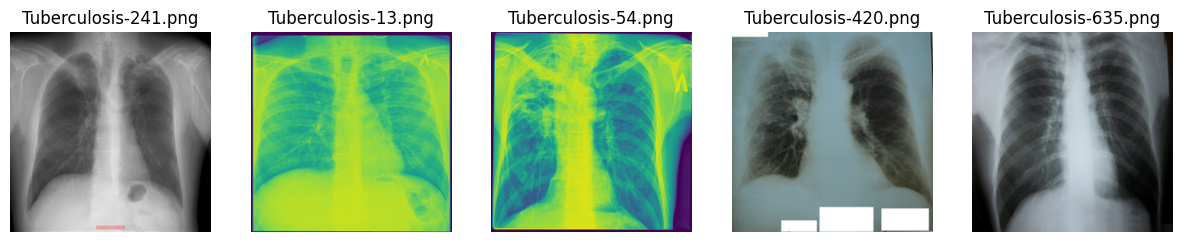

In [ ]:

# Count the number of images in each class
normal_count = len(os.listdir(normal_path))
tuberculosis_count = len(os.listdir(tuberculosis_path))

# Create a bar plot
classes = ['Normal', 'Tuberculosis']
counts = [normal_count, tuberculosis_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=classes, y=counts)
plt.title('Distribution of Classes in the Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.show()

# Example to display random images from each class (optional)
def display_random_images(path, num_images=5):
  images = os.listdir(path)
  random_images = random.sample(images, num_images)
  plt.figure(figsize=(15, 5))

  for i, image_name in enumerate(random_images):
      image_path = os.path.join(path, image_name)
      img = plt.imread(image_path)
      plt.subplot(1, num_images, i + 1)
      plt.imshow(img)
      plt.title(image_name)
      plt.axis('off')

  plt.show()

print("Normal Images:")
display_random_images(normal_path)
print("Tuberculosis Images:")
display_random_images(tuberculosis_path)

In [ ]:

# Define the path to the dataset folder
dataset_path = "/content/chest_xray/TB_Chest_Radiography_Database"


# Define the list of label folders in the dataset folder
label_folders = ["Normal", "Tuberculosis"]

# Define the size of the input images
img_height = 128
img_width = 128

# Define an empty list to store the images and their labels
data = []
labels = []

# Loop over the label folders in the dataset folder
for label_folder in label_folders:
    # Define the path to the label folder
    label_path = os.path.join(dataset_path, label_folder)
    # Loop over the images in the label folder
    for img_name in os.listdir(label_path):
        # Define the path to the image
        img_path = os.path.join(label_path, img_name)
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        # Append the image and its label to the data and labels lists
        data.append(img)
        labels.append(label_folder)

# Convert the data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Convert the labels to one-hot encoded vectors
# labels = to_categorical(labels)

# Print the shape of the data and labels arrays
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (4200, 128, 128, 3)
Labels shape: (4200,)


In [ ]:
import numpy as np


# Get the unique string values
unique_values = np.unique(labels)

# Create a mapping dictionary
mapping = {value: index for index, value in enumerate(unique_values)}

# Map the string values to numbers
mapped_arr = np.array([mapping[value] for value in labels])

print("Original array:", labels)
print("Mapped array:", mapped_arr)
print("Mapping dictionary:", mapping)

Original array: ['Normal' 'Normal' 'Normal' ... 'Tuberculosis' 'Tuberculosis'
 'Tuberculosis']
Mapped array: [0 0 0 ... 1 1 1]
Mapping dictionary: {'Normal': 0, 'Tuberculosis': 1}


# **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,mapped_arr, test_size = 0.2,random_state=0,shuffle=True)

# CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
input_shape = (128, 128,3)

model = models.Sequential([
    layers.Conv2D(128, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.02),
    layers.Flatten(),
    # layers.Dense(8, activation = 'relu'),
    layers.Dense(1, activation= 'sigmoid'),
])
#model.build(input_shape=input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','Precision','Recall'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 126, 126, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 508032)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │         508,033 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 511,617 (1.95 MB)

 Trainable params: 511,617 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Time the training process
start_time = time.time()

# Train the model
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, batch_size=32)
end_time = time.time()
training_time = end_time - start_time




Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - Precision: 0.3250 - Recall: 0.3473 - accuracy: 0.7720 - loss: 293.3621 - val_Precision: 0.9388 - val_Recall: 0.4842 - val_accuracy: 0.9226 - val_loss: 0.9806
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - Precision: 0.7663 - Recall: 0.6937 - accuracy: 0.9180 - loss: 1.0795 - val_Precision: 0.6133 - val_Recall: 0.9684 - val_accuracy: 0.9092 - val_loss: 0.8745
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - Precision: 0.8536 - Recall: 0.8317 - accuracy: 0.9504 - loss: 0.4058 - val_Precision: 0.9239 - val_Recall: 0.8947 - val_accuracy: 0.9747 - val_loss: 0.1858
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - Precision: 0.9668 - Recall: 0.9210 - accuracy: 0.9816 - loss: 0.0740 - val_Precision: 0.8679 - val_Recall: 0.9684 - val_accuracy: 0.9747 - val_loss: 0.1607
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - Precision: 0.9678 - Recall: 0.9712 - accuracy: 0.9893 - loss: 0.0361 - val_Precision: 0.8660 - val_Recall: 0.

## **Model Evalution**

In [ ]:
print(f"Training time: {training_time:.2f} seconds")

Training time: 47.52 seconds


In [ ]:

# Evaluate the model
results = model.evaluate(X_test, Y_test)
print("Evaluation Results:", results)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - Precision: 0.9656 - Recall: 0.8656 - accuracy: 0.9670 - loss: 0.1685
Evaluation Results: [0.19026094675064087, 0.9726190567016602, 0.9589040875434875, 0.8917197585105896]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Classification report
print(classification_report(Y_test, y_pred_classes))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       683
           1       0.96      0.89      0.92       157

    accuracy                           0.97       840
   macro avg       0.97      0.94      0.95       840
weighted avg       0.97      0.97      0.97       840



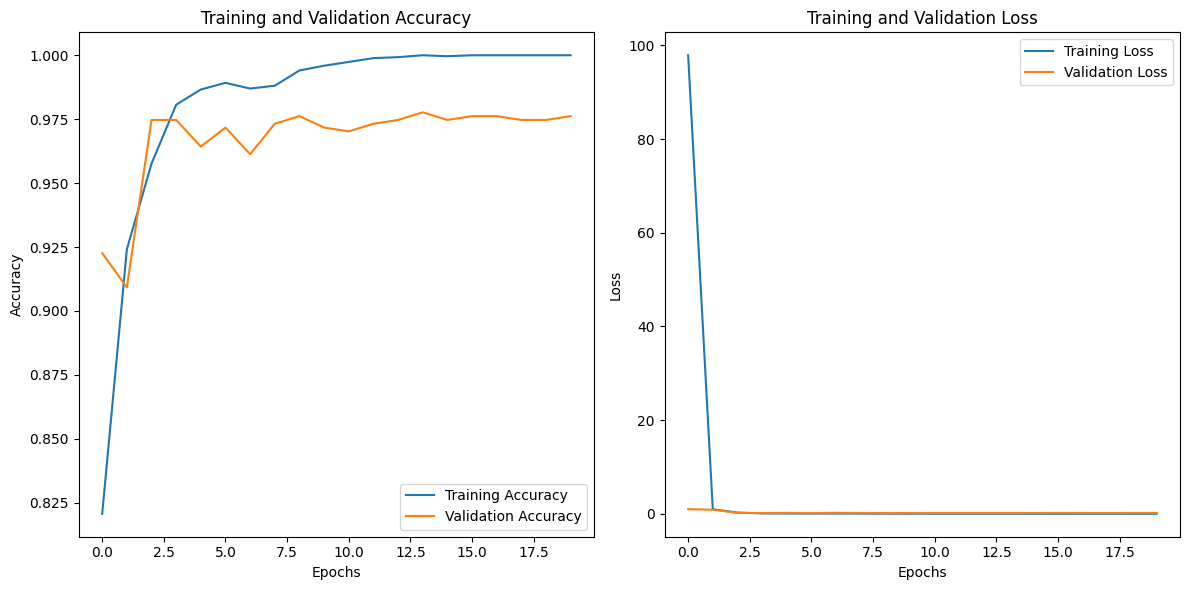

In [ ]:

import matplotlib.pyplot as plt

# Extracting history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


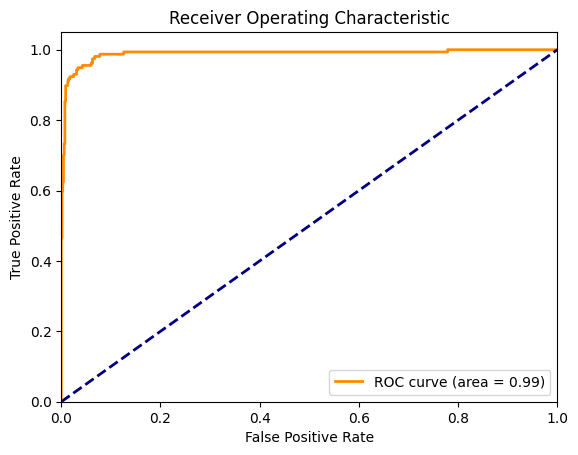

Loss: 0.19026094675064087


In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Loss value (already printed in evaluation results)
print(f"Loss: {results[0]}")

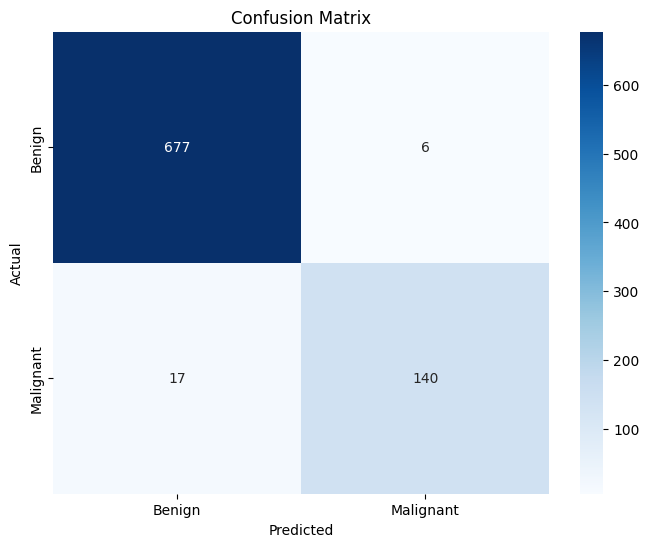

In [ ]:

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# **VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16
# VGG16
input_shape = (128, 128, 3)

# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze base model layers
base_model.trainable = False

# Create a new model on top
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Adjust units as needed
model.add(Dropout(0.5)) # Add dropout for regularization
model.add(Dense(1, activation='sigmoid'))


In [ ]:


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:

# Time the training process
start_time = time.time()

# Train the model
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, batch_size=32) # Reduced epochs for demonstration

end_time = time.time()
training_time = end_time - start_time


Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - Precision: 0.9705 - Recall: 0.9363 - accuracy: 0.9837 - loss: 0.0774 - val_Precision: 1.0000 - val_Recall: 0.9263 - val_accuracy: 0.9896 - val_loss: 0.1048
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - Precision: 0.9804 - Recall: 0.9836 - accuracy: 0.9940 - loss: 0.0265 - val_Precision: 1.0000 - val_Recall: 0.9368 - val_accuracy: 0.9911 - val_loss: 0.0733
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - Precision: 0.9894 - Recall: 0.9739 - accuracy: 0.9935 - loss: 0.0367 - val_Precision: 1.0000 - val_Recall: 0.9368 - val_accuracy: 0.9911 - val_loss: 0.0416
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - Precision: 0.9884 - Recall: 0.9762 - accuracy: 0.9944 - loss: 0.0259 - val_Precision: 0.9891 - val_Recall: 0.9579 - val_accuracy: 0.9926 - val_loss: 0.0369
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - Precision: 0.9794 - Recall: 0.9594 - accuracy: 0.9905 - loss: 0.0449 - val_Precision: 1.0000 - val_Recall: 0.95

## **Model Evalution**

In [ ]:

print(f"Training time: {training_time:.2f} seconds")


Training time: 97.64 seconds


In [ ]:

# Evaluate the model
results = model.evaluate(X_test, Y_test)
print("Evaluation Results:", results)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - Precision: 1.0000 - Recall: 0.9488 - accuracy: 0.9898 - loss: 0.0912
Evaluation Results: [0.062041331082582474, 0.9928571581840515, 1.0, 0.9617834687232971]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Classification report
print(classification_report(Y_test, y_pred_classes))

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       683
           1       1.00      0.96      0.98       157

    accuracy                           0.99       840
   macro avg       1.00      0.98      0.99       840
weighted avg       0.99      0.99      0.99       840



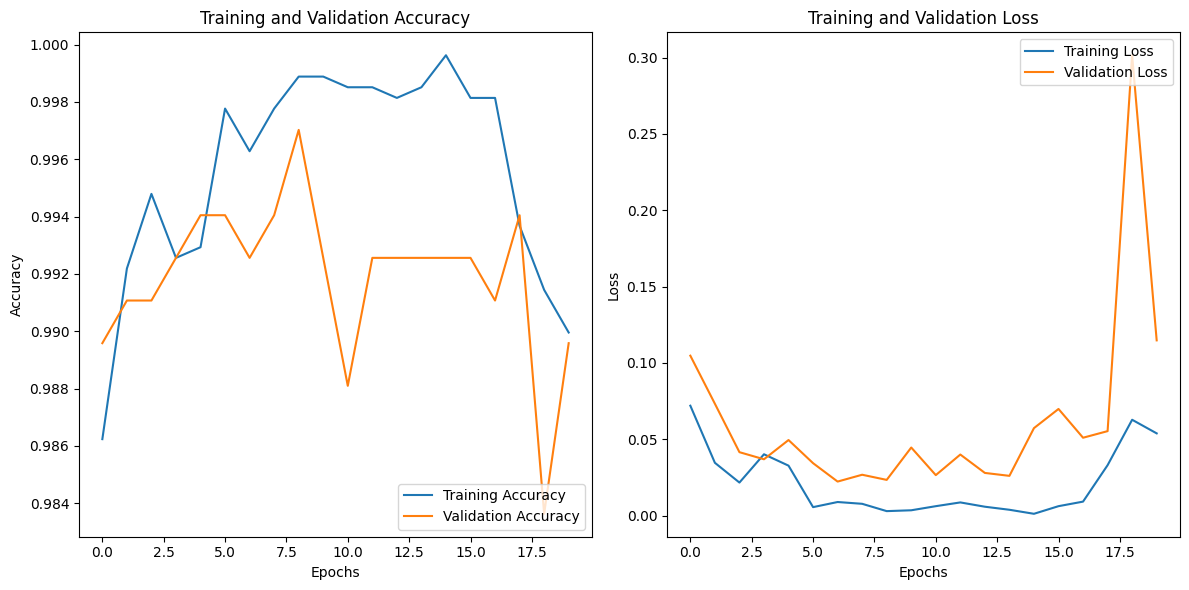

In [ ]:

import matplotlib.pyplot as plt

# Extracting history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


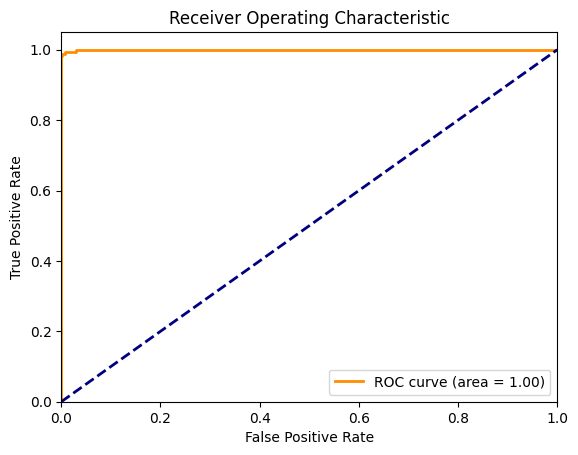

Loss: 0.062041331082582474


In [ ]:

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Loss value (already printed in evaluation results)
print(f"Loss: {results[0]}")

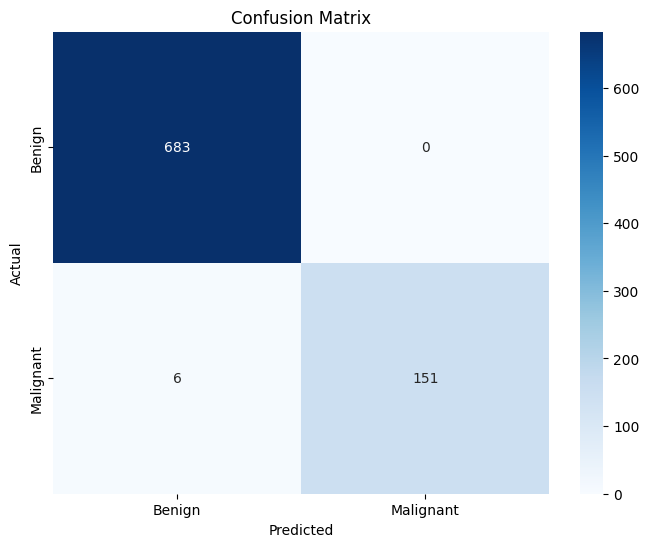

In [ ]:

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# **Mobile Net**

In [ ]:
from tensorflow.keras.applications import MobileNet

# Load the pre-trained MobileNet model (excluding the top classification layer)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))  # Add a dense layer
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

# Print the model summary
model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional)      │ (None, 4, 4, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,618,497 (44.32 MB)

 Trainable params: 8,389,633 (32.00 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:

# Time the training process
start_time = time.time()

# Train the model
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, batch_size=32) # Reduced epochs for demonstration

end_time = time.time()
training_time = end_time - start_time

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - Precision: 0.6302 - Recall: 0.6199 - accuracy: 0.8827 - loss: 1.8119 - val_Precision: 0.9263 - val_Recall: 0.9263 - val_accuracy: 0.9792 - val_loss: 0.0624
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - Precision: 0.9352 - Recall: 0.9174 - accuracy: 0.9749 - loss: 0.0619 - val_Precision: 0.9674 - val_Recall: 0.9368 - val_accuracy: 0.9866 - val_loss: 0.0527
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - Precision: 0.9603 - Recall: 0.9453 - accuracy: 0.9847 - loss: 0.0487 - val_Precision: 1.0000 - val_Recall: 0.8737 - val_accuracy: 0.9821 - val_loss: 0.0640
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - Precision: 0.9870 - Recall: 0.9511 - accuracy: 0.9900 - loss: 0.0308 - val_Precision: 1.0000 - val_Recall: 0.9053 - val_accuracy: 0.9866 - val_loss: 0.0518
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - Precision: 0.9924 - Recall: 0.9847 - accuracy: 0.9962 - loss: 0.0161 - val_Precision: 1.0000 - val_Recall: 0.87

## **Model Evalution**

In [ ]:

print(f"Training time: {training_time:.2f} seconds")


Training time: 38.58 seconds


In [ ]:

# Evaluate the model
results = model.evaluate(X_test, Y_test)
print("Evaluation Results:", results)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - Precision: 0.9737 - Recall: 0.9310 - accuracy: 0.9813 - loss: 0.1028
Evaluation Results: [0.17023809254169464, 0.9773809313774109, 0.9599999785423279, 0.9171974658966064]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Classification report
print(classification_report(Y_test, y_pred_classes))

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       683
           1       0.96      0.92      0.94       157

    accuracy                           0.98       840
   macro avg       0.97      0.95      0.96       840
weighted avg       0.98      0.98      0.98       840



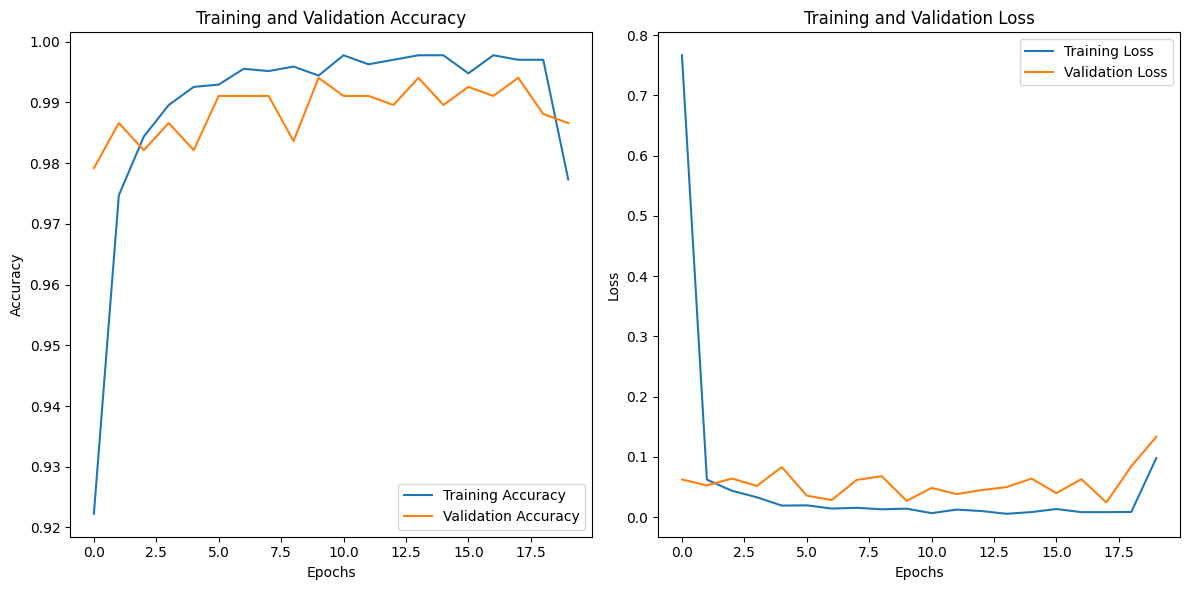

In [ ]:

import matplotlib.pyplot as plt

# Extracting history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


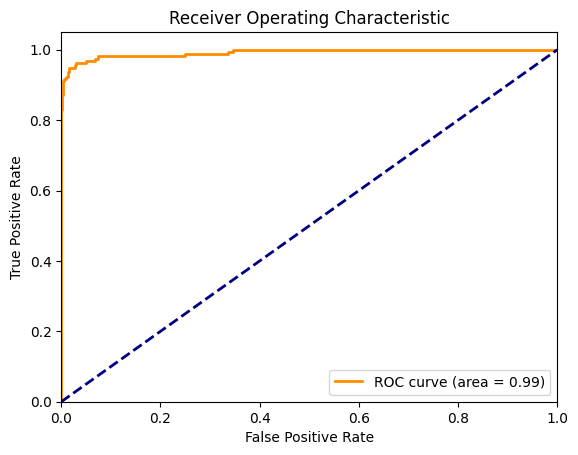

Loss: 0.17023809254169464


In [ ]:

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Loss value (already printed in evaluation results)
print(f"Loss: {results[0]}")

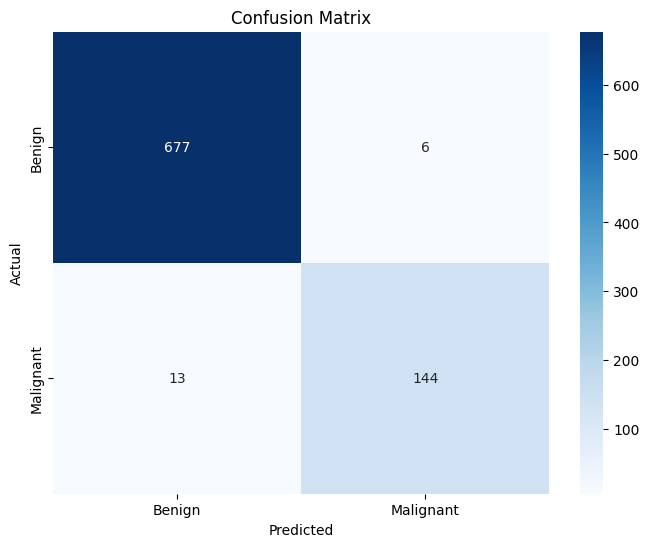

In [ ]:

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# **Efficientnet Model**

In [ ]:
!pip install efficientnet

from tensorflow.keras.applications import EfficientNetB0 # Or any other EfficientNet variant
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


# Load the pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

# Print the model summary
model.summary()


Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_26            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ input_layer_26[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 128, 128, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 129, 129, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,705,956 (17.95 MB)

 Trainable params: 656,385 (2.50 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:



# Time the training process
start_time = time.time()

# Train the model
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20, batch_size=32) # Reduced epochs for demonstration

end_time = time.time()
training_time = end_time - start_time

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - Precision: 0.6995 - Recall: 0.5893 - accuracy: 0.8846 - loss: 0.2549 - val_Precision: 0.9773 - val_Recall: 0.9053 - val_accuracy: 0.9836 - val_loss: 0.0523
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - Precision: 0.9453 - Recall: 0.8981 - accuracy: 0.9739 - loss: 0.0705 - val_Precision: 0.9688 - val_Recall: 0.9789 - val_accuracy: 0.9926 - val_loss: 0.0375
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - Precision: 0.9664 - Recall: 0.9574 - accuracy: 0.9872 - loss: 0.0415 - val_Precision: 0.9490 - val_Recall: 0.9789 - val_accuracy: 0.9896 - val_loss: 0.0372
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - Precision: 0.9540 - Recall: 0.9595 - accuracy: 0.9853 - loss: 0.0379 - val_Precision: 0.9677 - val_Recall: 0.9474 - val_accuracy: 0.9881 - val_loss: 0.0355
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - Precision: 0.9806 - Recall: 0.9472 - accuracy: 0.9880 - loss: 0.0366 - val_Precision: 1.0000 - val_Recall: 0.

## **Model Evalution**

In [ ]:

print(f"Training time: {training_time:.2f} seconds")


Training time: 63.37 seconds


In [ ]:

# Evaluate the model
results = model.evaluate(X_test, Y_test)
print("Evaluation Results:", results)


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - Precision: 1.0000 - Recall: 0.9851 - accuracy: 0.9970 - loss: 0.0097
Evaluation Results: [0.013857857324182987, 0.9952380657196045, 1.0, 0.9745222926139832]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Classification report
print(classification_report(Y_test, y_pred_classes))

27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 250ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       683
           1       1.00      0.97      0.99       157

    accuracy                           1.00       840
   macro avg       1.00      0.99      0.99       840
weighted avg       1.00      1.00      1.00       840



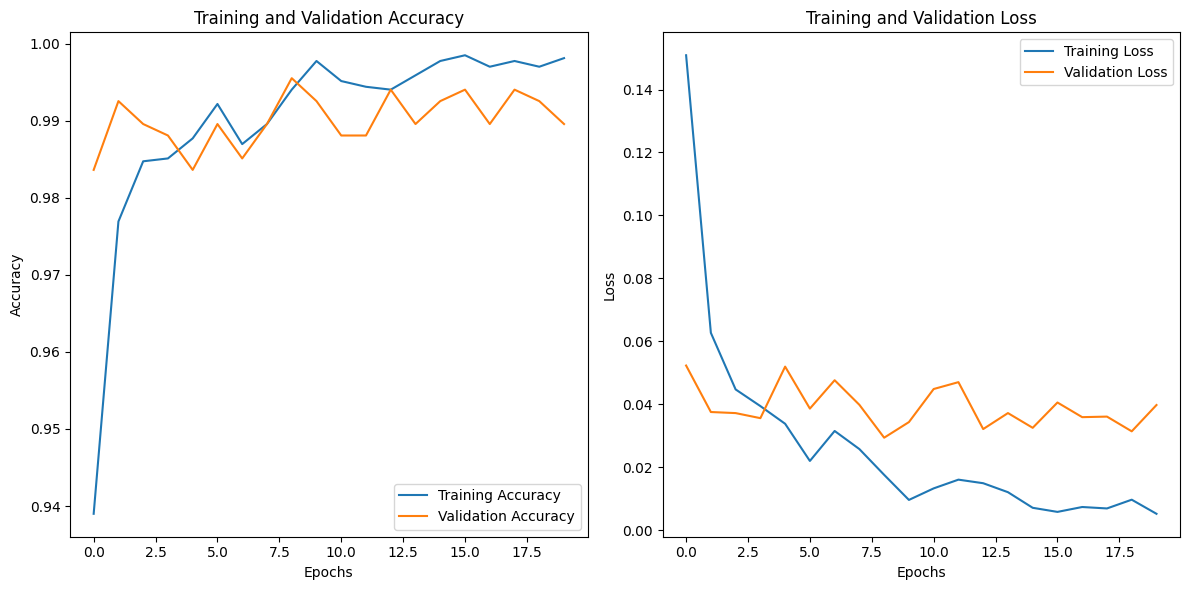

In [ ]:

import matplotlib.pyplot as plt

# Extracting history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


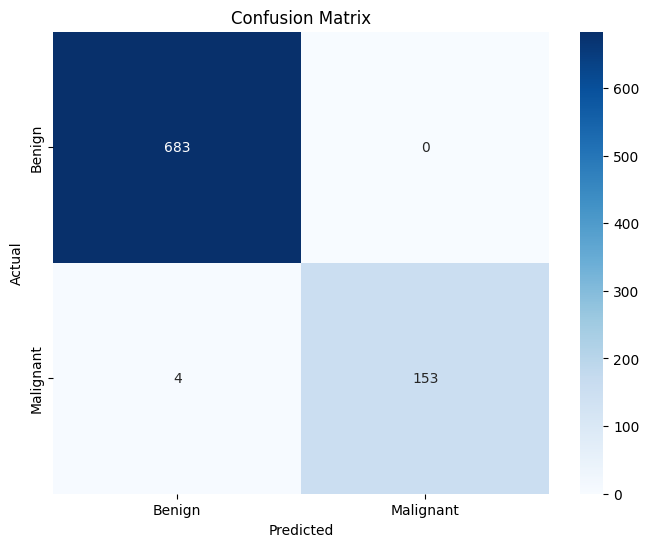

In [ ]:

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

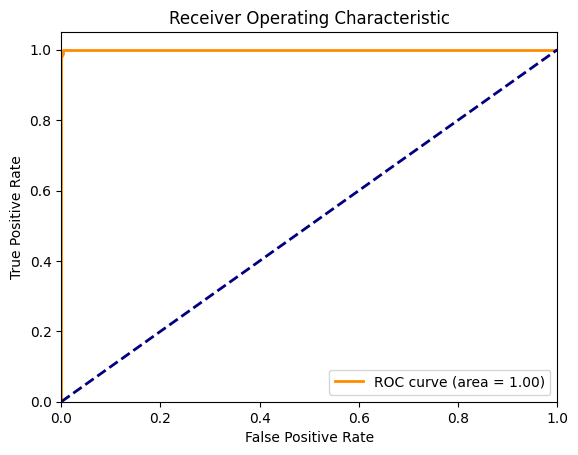

Loss: 0.013857857324182987


In [ ]:

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Loss value (already printed in evaluation results)
print(f"Loss: {results[0]}")